# Source sensitivity calculations

In [ ]:
import math

import matplotlib.pyplot as plt
import numpy as np

# %matplotlib widget

## Dataset

In [ ]:
tubes = {
    'J305': {
        'sensitivity': 135.200,
        'sources': {
            'Cs-137': 1,
            'Co-60': 1.114,
            'Tc-99m': 6.380,
            'I-131': 0.990,
            'Lu-177': 3.487,
            'Am-241': 11.925,
            'Radium': 1.062,
            'Uranium ore': 1.210,
            'Uranium glaze': 1.367,
            'Depleted uranium': 1.353,
            'Thorium ore': 1.113,
            'X-ray tube (60 kV)': 5.486,
            'K-40': 1.052,
            'Natural background': 1.338,
        }
    },
    'M4011': {
        'sensitivity': 108.345,
        'sources': {
            'Cs-137': 1,
            'Co-60': 1.119,
            'Tc-99m': 6.401,
            'I-131': 0.998,
            'Lu-177': 3.516,
            'Am-241': 11.880,
            'Radium': 1.066,
            'Uranium ore': 1.214,
            'Uranium glaze': 1.370,
            'Depleted uranium': 1.356,
            'Thorium ore': 1.118,
            'X-ray tube (60 kV)': 5.465,
            'K-40': 1.058,
            'Natural background': 1.345,
        }
    },
    'HH614': {
        'sensitivity': 30.157,
        'sources': {
            'Cs-137': 1,
            'Co-60': 1.371,
            'Tc-99m': 2.567,
            'I-131': 0.761,
            'Lu-177': 1.109,
            'Am-241': 4.468,
            'Radium': 0.979,
            'Uranium ore': 0.973,
            'Uranium glaze': 0.973,
            'Depleted uranium': 1.089,
            'Thorium ore': 0.416,
            'X-ray tube (60 kV)': 2.424,
            'K-40': 1.398,
            'Natural background': 1.099,
        }
    },
    'SBM20': {
        'sensitivity': 106.105,
        'sources': {
            'Cs-137': 1,
            'Co-60': 0.794,
            'Tc-99m': 3.293,
            'I-131': 0.926,
            'Lu-177': 1.431,
            'Am-241': 6.835,
            'Radium': 0.874,
            'Uranium ore': 0.967,
            'Uranium glaze': 1.061,
            'Depleted uranium': 1.057,
            'Thorium ore': 0.864,
            'X-ray tube (60 kV)': 5.735,
            'K-40': 0.740,
            'Natural background': 1.018,
        }
    },
    'SI3BG': {
        'sensitivity': 3.267,
        'sources': {
            'Cs-137': 1,
            'Co-60': 1.389,
            'Tc-99m': 2.410,
            'I-131': 0.747,
            'Lu-177': 1.102,
            'Am-241': 0.544,
            'Radium': 0.985,
            'Uranium ore': 0.973,
            'Uranium glaze': 1.011,
            'Depleted uranium': 1.096,
            'Thorium ore': 0.697,
            'X-ray tube (60 kV)': 0.123,
            'K-40': 1.472,
            'Natural background': 1.027,
        }
    },
    'LND 7317': {
        'sensitivity': 252.567,
        'sources': {
            'Cs-137': 1,
            'Co-60': 0.998,
            'Tc-99m': 2.466,
            'I-131': 0.943,
            'Lu-177': 1.443,
            'Am-241': 3.123,
            'Radium': 0.990,
            'Uranium ore': 1.068,
            'Uranium glaze': 1.123,
            'Depleted uranium': 1.118,
            'Thorium ore': 1.011,
            'X-ray tube (60 kV)': 2.806,
            'K-40': 0.987,
            'Natural background': 1.150,
        }
    },
}


## Analysis

In [ ]:
tubes_sources = np.zeros((6, 14))
sensitivities = set()

for tube_index, tube in enumerate(tubes):
    contents = tubes[tube]
    sources = contents['sources']
    for source_index, source in enumerate(sources):
        sensitivity = sources[source]

        tubes_sources[tube_index][source_index] = sensitivity
        sensitivities.add(sensitivity)

x = np.array(list(sensitivities))
x.sort()

Minimum value:  0.125
Maximum value:  11.925


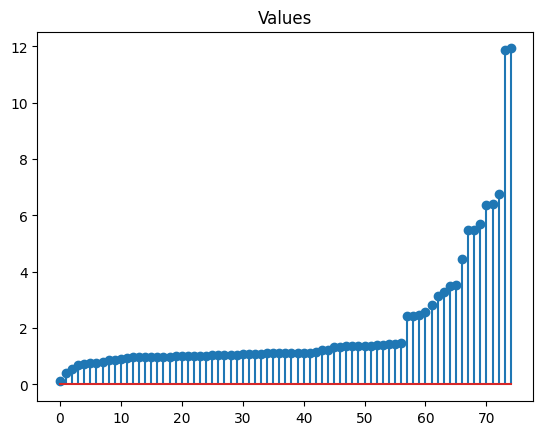

In [ ]:
plt.figure()
plt.title('Values')
plt.stem(x)

print('Minimum value: ', np.min(tubes_sources))
print('Maximum value: ', np.max(tubes_sources))

## Encoding and decoding

In [ ]:
x_min = 0.125
octaves = 7
scale = 36

x_enc = np.int32(np.trunc(scale * np.log2(tubes_sources / x_min)))
x_dec = x_min * np.exp2(x_enc / scale)

x_delta = tubes_sources - x_dec

In [ ]:
print('Tubes sensitivity:')
print(tubes_sources)

Tubes sensitivity:
[[ 1.     1.114  6.38   0.99   3.487 11.925  1.062  1.21   1.367  1.353
   1.113  5.486  1.052  1.338]
 [ 1.     1.119  6.401  0.998  3.516 11.88   1.066  1.214  1.37   1.356
   1.118  5.465  1.058  1.345]
 [ 1.     1.371  2.567  0.761  1.109  4.468  0.979  0.973  0.973  1.089
   0.416  2.424  1.398  1.099]
 [ 1.     0.791  3.267  0.918  1.424  6.774  0.869  0.961  1.054  1.05
   0.858  5.686  0.735  1.012]
 [ 1.     1.397  2.419  0.762  1.104  0.554  0.991  0.978  1.015  1.1
   0.697  0.125  1.478  1.028]
 [ 1.     0.998  2.466  0.943  1.443  3.123  0.99   1.068  1.123  1.118
   1.011  2.806  0.987  1.15 ]]


In [ ]:

print('Encoded values:')
print(x_enc)

Encoded values:
[[108 113 204 107 172 236 111 117 124 123 113 196 110 123]
 [108 113 204 107 173 236 111 118 124 123 113 196 110 123]
 [108 124 156  93 113 185 106 106 106 112  62 153 125 112]
 [108  95 169 103 126 207 100 105 110 110 100 198  92 108]
 [108 125 153  93 113  77 107 106 108 112  89   0 128 109]
 [108 107 154 104 127 167 107 111 114 113 108 161 107 115]]


In [ ]:

print('Decoded values:')
print(x_dec)

Decoded values:
[[ 1.          1.1010568   6.34960421  0.98093009  3.42897593 11.75787594
   1.05946309  1.18920712  1.36079     1.33483985  1.1010568   5.44316
   1.03925923  1.33483985]
 [ 1.          1.1010568   6.34960421  0.98093009  3.49563743 11.75787594
   1.05946309  1.21232607  1.36079     1.33483985  1.1010568   5.44316
   1.03925923  1.33483985]
 [ 1.          1.36079     2.5198421   0.74915354  1.1010568   4.40422718
   0.96222384  0.96222384  0.96222384  1.08005974  0.4124303   2.37841423
   1.38724463  1.08005974]
 [ 1.          0.77856473  3.2365223   0.90821836  1.41421356  6.72717132
   0.85724398  0.94387431  1.03925923  1.03925923  0.85724398  5.65685425
   0.73486725  1.        ]
 [ 1.          1.38724463  2.37841423  0.74915354  1.1010568   0.5505284
   0.98093009  0.96222384  1.          1.08005974  0.69362232  0.125
   1.46973449  1.01944064]
 [ 1.          0.98093009  2.42465213  0.92587471  1.44170678  3.11425891
   0.98093009  1.05946309  1.12246205  1.101056

In [ ]:

print('Difference:')
print(x_delta)

Difference:
[[0.00000000e+00 1.29432045e-02 3.03957921e-02 9.06991233e-03
  5.80240686e-02 1.67124062e-01 2.53690564e-03 2.07928850e-02
  6.20999983e-03 1.81601458e-02 1.19432045e-02 4.28399993e-02
  1.27407740e-02 3.16014583e-03]
 [0.00000000e+00 1.79432045e-02 5.13957921e-02 1.70699123e-02
  2.03625692e-02 1.22124062e-01 6.53690564e-03 1.67393319e-03
  9.20999983e-03 2.11601458e-02 1.69432045e-02 2.18399993e-02
  1.87407740e-02 1.01601458e-02]
 [0.00000000e+00 1.02099998e-02 4.71579002e-02 1.18464616e-02
  7.94320455e-03 6.37728182e-02 1.67761631e-02 1.07761631e-02
  1.07761631e-02 8.94026111e-03 3.56970283e-03 4.55857700e-02
  1.07553663e-02 1.89402611e-02]
 [0.00000000e+00 1.24352735e-02 3.04776995e-02 9.78163731e-03
  9.78643763e-03 4.68286780e-02 1.17560171e-02 1.71256873e-02
  1.47407740e-02 1.07407740e-02 7.56017147e-04 2.91457505e-02
  1.32753862e-04 1.20000000e-02]
 [0.00000000e+00 9.75536628e-03 4.05857700e-02 1.28464616e-02
  2.94320455e-03 3.47160227e-03 1.00699123e-02 1.5

In [ ]:
print('RMS error:')
print(np.sqrt(np.mean(x_delta ** 2)))

RMS error:
0.03044208246065546
